## Data Cleaning and Preprocessing Notebook

This notebook is to be strictly used for data cleaning and preprocessing purposes. Steps:

1. Read the dataset
2. Handle Missing Values (if any).
3. Do visualizations as required
4. Explore your data here
5. Save the cleaned and processed dataset as `data/final_dataset.csv`.
6. Split the dataset obtained in step 5 as `input/train.csv`,`input/test.csv`,`input/validation.csv`

NO MODELLING WILL BE DONE IN THIS NOTEBOOK!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
print(os.listdir("../data/"))

['dataset-of-00s.csv', 'dataset-of-10s.csv', 'dataset-of-60s.csv', 'dataset-of-70s.csv', 'dataset-of-80s.csv', 'dataset-of-90s.csv', 'README.md']


In [3]:
def read_df_and_add_year(dir_path):
    df=pd.DataFrame()
    for i in os.listdir(dir_path):
        if os.path.splitext(i)[-1]==".csv":
            new=pd.read_csv(os.path.join(dir_path,i))
            filename=os.path.splitext(i)[0]
            filename=filename.split("-")[-1]
            filename=filename[:-1]
            if int(filename)>10:
                new["decade"]=1900+int(filename)
            else:
                new["decade"]=2000+int(filename)
            df=pd.concat([df,new])
    return df

In [4]:
combined=read_df_and_add_year("../data/")

In [5]:
combined.to_csv("../data/combined_music_data.csv",index=False)
combined=pd.read_csv("../data/combined_music_data.csv")

c:\Users\Ashwin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

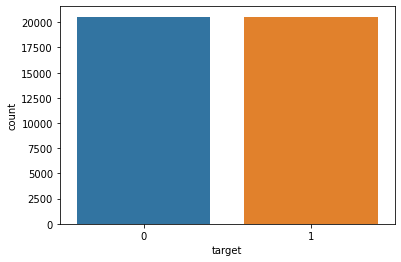

In [6]:
sns.countplot(combined.target)

We thus have a balanced dataset here, with equal representation for both hits and flops. The dataset is large enough (40000 rows) and will be suitable for modelling audio data

In [7]:
combined.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
decade              0
dtype: int64

We have no null values either, making this a very useful dataset

In [8]:
combined[combined['target']==1].to_csv("../data/Hit_Songs_Dataset.csv",index=False)
combined[combined['target']==0].to_csv("../data/Flop_Songs_Dataset.csv",index=False)

In [9]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

In [10]:
combined.drop(columns=["uri","track"],inplace=True)

In [11]:
encoding={name:number for number,name in enumerate(combined["artist"].unique())}

In [12]:
len(encoding)==combined.artist.nunique()

True

In [13]:
combined["artist"].replace(encoding,inplace=True)

In [14]:
combined.index.nunique()

41106

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
X=combined.drop(columns=["target"])
y=combined[["target"]]

In [17]:
y

,target
0,1
1,1
2,0
3,0
4,1
...,...
41101,0
41102,0
41103,1
41104,0


In [18]:
scaler=MinMaxScaler()
scaled=scaler.fit_transform(X)
scaled_df=pd.DataFrame(scaled,columns=X.columns)
scaled_df["target"]=y["target"]

In [19]:
scaled_df

,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,target
0,0.000000,0.585020,0.470867,0.363636,0.792177,1.0,0.030104,0.369478,0.000000,0.148073,0.534137,0.551153,0.043691,0.8,0.071288,0.076923,0.8,1
1,0.000084,0.712551,0.853963,0.909091,0.826009,0.0,0.190625,0.018574,0.000000,0.136917,0.690763,0.385166,0.054733,0.8,0.095828,0.059172,0.8,1
2,0.000168,0.163968,0.835959,0.818182,0.872578,1.0,0.049271,0.000111,0.004570,0.163286,0.301205,0.360214,0.077911,0.8,0.150812,0.076923,0.8,0
3,0.000252,0.190283,0.993998,0.363636,0.858690,1.0,0.172917,0.000007,0.078400,0.181542,0.334337,0.614854,0.057881,0.8,0.135267,0.053254,0.8,0
4,0.000336,0.637652,0.763941,0.181818,0.847218,1.0,0.028646,0.364458,0.000000,0.113590,0.633534,0.464322,0.042982,0.8,0.052227,0.059172,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,0.999916,0.400810,0.794949,0.818182,0.814820,0.0,0.243750,0.000932,0.000209,0.171400,0.765060,0.633506,0.016110,0.8,0.070042,0.035503,0.6,0
41102,0.911955,0.628543,0.654913,0.818182,0.810838,0.0,0.032188,0.050803,0.006260,0.081846,0.692771,0.555734,0.047288,0.8,0.080555,0.059172,0.6,0
41103,1.000000,0.568826,0.313828,0.909091,0.642301,0.0,0.031042,0.441767,0.000011,0.094320,0.573293,0.691098,0.042035,0.8,0.048750,0.059172,0.6,1
41104,0.135260,0.629555,0.780945,0.636364,0.814631,1.0,0.038333,0.000101,0.755000,0.375254,0.214859,0.497264,0.075784,0.8,0.108812,0.065089,0.6,0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train,test=train_test_split(scaled_df,test_size=0.33,random_state=69)

In [22]:
train

,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,target
12892,0.493909,0.756073,0.768942,0.818182,0.767628,0.0,0.080000,0.645582,0.000000,0.189655,0.828313,0.541071,0.033300,0.8,0.061849,0.041420,0.0,1
2788,0.096278,0.339069,0.984996,1.000000,0.815159,0.0,0.097292,0.000271,0.000000,0.278905,0.168675,0.770904,0.046420,0.8,0.089489,0.059172,0.8,0
35259,0.144837,0.571862,0.380845,0.363636,0.643621,1.0,0.030208,0.245984,0.000003,0.056085,0.647590,0.696765,0.050285,0.8,0.076521,0.071006,0.4,1
28350,0.506175,0.631579,0.672918,0.000000,0.795045,1.0,0.098333,0.032530,0.000000,0.061258,0.688755,0.571333,0.068740,0.8,0.071268,0.071006,0.2,1
14145,0.495169,0.482794,0.327831,0.090909,0.765383,1.0,0.028229,0.826305,0.000001,0.275862,0.515060,0.298290,0.030092,0.8,0.121177,0.035503,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37142,0.917584,0.875506,0.640910,0.909091,0.803838,0.0,0.168750,0.061345,0.000107,0.207911,0.765060,0.394772,0.059774,0.8,0.247747,0.041420,0.6,1
11825,0.198605,0.876518,0.729932,0.454545,0.774610,1.0,0.079896,0.137550,0.000000,0.072312,0.627510,0.490935,0.087628,0.8,0.081476,0.082840,1.0,1
25015,0.707805,0.423077,0.619905,0.818182,0.823877,1.0,0.040104,0.272088,0.009420,0.090264,0.428715,0.553191,0.051011,0.8,0.064370,0.047337,0.2,1
9818,0.417962,0.648785,0.406851,0.727273,0.708512,0.0,0.040625,0.000170,0.089600,0.168357,0.372490,0.579936,0.064425,0.8,0.072296,0.065089,1.0,0


In [23]:
test,valid=train_test_split(scaled_df,test_size=0.5,random_state=69)

In [25]:
train.to_csv("../input/train.csv",index=False)
test.to_csv("../input/test.csv",index=False)
valid.to_csv("../input/validation.csv",index=False)